# About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime

## Types of customers

1. Casual: customers who purchase single-ride or full-day passes.


2. Member: customers who purchase annual memberships.

# Question for the analysis

# Business task

Design marketing strategies aimed at converting casual riders into annual members

# Importing modules

In [3]:
import pandas as pd
import datetime
import seaborn as sns

# Importing datasets

In [4]:
#import data
trip_202011 = pd.read_csv('202011-divvy-tripdata.csv')
trip_202012 = pd.read_csv('202012-divvy-tripdata.csv')
trip_202101 = pd.read_csv('202101-divvy-tripdata.csv')
trip_202102 = pd.read_csv('202102-divvy-tripdata.csv')
trip_202103 = pd.read_csv('202103-divvy-tripdata.csv')
trip_202104 = pd.read_csv('202104-divvy-tripdata.csv')
trip_202105 = pd.read_csv('202105-divvy-tripdata.csv')
trip_202106 = pd.read_csv('202106-divvy-tripdata.csv')
trip_202107 = pd.read_csv('202107-divvy-tripdata.csv')
trip_202108 = pd.read_csv('202108-divvy-tripdata.csv')
trip_202109 = pd.read_csv('202109-divvy-tripdata.csv')
trip_202110 = pd.read_csv('202110-divvy-tripdata.csv')

# Merging datasets to a full year

In [5]:
#join data on rows to get a year
frames =[trip_202011, trip_202012, trip_202101, trip_202102, trip_202103,
         trip_202104, trip_202105, trip_202106, trip_202107, trip_202108,
         trip_202109, trip_202110]

trip_year = pd.concat(frames)
trip_year.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


# Data cleaning

### fixing format 

In [6]:
#convert started_at and ended_at to datetime
trip_year['started_at'] = pd.to_datetime(trip_year['started_at'])
trip_year['ended_at'] = pd.to_datetime(trip_year['ended_at'])

### creating new columns

In [7]:
#substract started_at from ended_at to get ride_length (new column)
trip_year['ride_length'] = trip_year['ended_at'].sub(trip_year['started_at'], 
                                                  axis = 0)
#convert ride_lenght to seconds
trip_year['ride_length'] = trip_year['ride_length'].dt.total_seconds().astype(int).abs()


In [8]:
#create new_column day, month, and season

#for day of the week
trip_year['day'] = trip_year['started_at'].dt.day_name()

#for month of the year
trip_year['month'] = trip_year['started_at'].dt.month_name()

#for season of the year
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer',
           'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
month_to_season = dict(zip(months, seasons))
trip_year['season'] = trip_year['started_at'].dt.month_name().map(month_to_season)

In [9]:
#selected columns
trip_year=trip_year[['ride_id', 'rideable_type', 'started_at', 'ended_at','ride_length',
                     'member_casual', 'day', 'month', 'season',]]
trip_year.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,member_casual,day,month,season
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,580,casual,Sunday,November,Autumn
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,679,casual,Sunday,November,Autumn
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,1741,casual,Sunday,November,Autumn
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,555,casual,Sunday,November,Autumn
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,2007,casual,Sunday,November,Autumn


### duplicates and nulls

In [23]:
#check for duplicate rows

trip_year.duplicated().sum()

0

In [24]:
#check for nulls
trip_year[pd.isnull(trip_year)].sum()

ride_id            0
rideable_type      0
ride_length      0.0
member_casual      0
day                0
month              0
season             0
dtype: object

# Analysis phase

In [25]:
print(trip_year.groupby('member_casual').describe()['ride_length'])

                   count         mean           std  min    25%    50%  \
member_casual                                                            
casual         2470517.0  2008.003164  18555.776440  0.0  557.0  982.0   
member         2908317.0  1013.878054  17465.756077  0.0  345.0  594.0   

                  75%        max  
member_casual                     
casual         1799.0  3356649.0  
member         1025.0  1742998.0  


In [57]:
print(trip_year.groupby(['member_casual','rideable_type']).count()['ride_length'])
print(trip_year.groupby(['member_casual','season']).count()['ride_length'])
print(trip_year.groupby(['member_casual','month']).count()['ride_length'])
print(trip_year.groupby(['member_casual','day']).count()['ride_length'])


member_casual  rideable_type
casual         classic_bike     1226304
               docked_bike       350781
               electric_bike     893432
member         classic_bike     1840666
               docked_bike       113606
               electric_bike     954045
Name: ride_length, dtype: int64
member_casual  season
casual         Autumn     709231
               Spring     477550
               Summer    1225408
               Winter      58328
member         Autumn     937858
               Spring     619809
               Summer    1130949
               Winter     219701
Name: ride_length, dtype: int64
member_casual  month    
casual         April        136601
               August       412671
               December      30080
               February      10131
               January       18117
               July         442056
               June         370681
               March         84033
               May          256916
               November      88099
      

In [59]:
print(trip_year.groupby(['member_casual','rideable_type']).mean()['ride_length'])
print(trip_year.groupby(['member_casual','season']).mean()['ride_length'])
print(trip_year.groupby(['member_casual','month']).mean()['ride_length'])
print(trip_year.groupby(['member_casual','day']).mean()['ride_length'])

member_casual  rideable_type
casual         classic_bike     1739.696018
               docked_bike      4667.956155
               electric_bike    1331.919428
member         classic_bike      859.879473
               docked_bike      3626.965301
               electric_bike     999.830039
Name: ride_length, dtype: float64
member_casual  season
casual         Autumn    1717.003457
               Spring    2289.525880
               Summer    1965.122928
               Winter    4142.323275
member         Autumn     792.446004
               Spring     869.949643
               Summer     859.831767
               Winter    3158.148852
Name: ride_length, dtype: float64
member_casual  month    
casual         April        2281.379390
               August       1727.184118
               December     6106.441423
               February     2962.393742
               January      1541.075399
               July         1967.410484
               June         2227.286942
               M

#### discoveries

1. Count of annual membership is greater than count of casual members but the average ride_lenght of casual members is greater than annual members

2. Most of the annual members use the bikes on weekdays while most of casual members use them on weekends


# Data visualization

<AxesSubplot:>

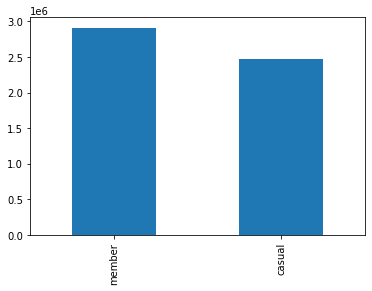

In [48]:
trip_year['member_casual'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='member_casual', ylabel='count'>

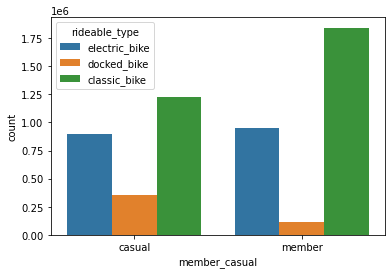

In [51]:
import seaborn as sns
sns.countplot(data = trip_year, x = 'member_casual',hue ='rideable_type')

Both members tend to use classic bikes more

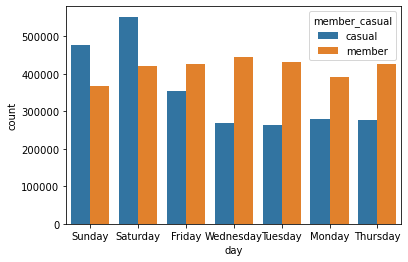

In [54]:
sns.countplot(x="day", hue="member_casual" , data=trip_year);

. Casual members operate mostly on weekends 

. Annual members operate mostly on weekdays

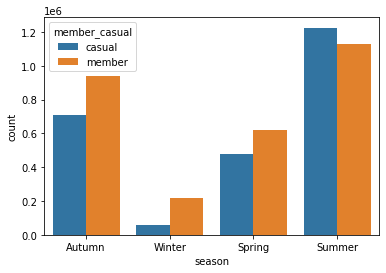

In [55]:
sns.countplot(x="season", hue="member_casual" , data=trip_year);

. Both operate on summers and Autumn mostly

<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

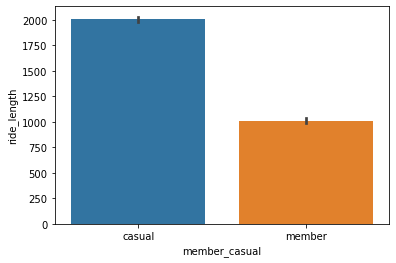

In [56]:
sns.barplot(x='member_casual', y='ride_length', data=trip_year,)

Although annual members are more than casual members, casual members use the bikes more

<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

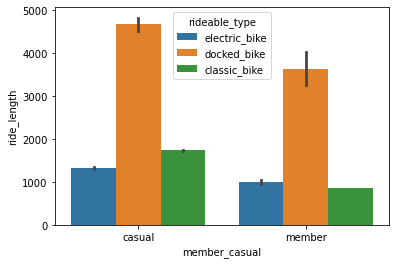

In [15]:
sns.barplot(x='member_casual', y='ride_length', hue='rideable_type', data=trip_year,)

# Recommendations

1. Cyclistic should encourage casual members to use the bikes on weekdays for their mobility needs

2. Limiting time per ride will make casual members subscribe more because they cover most distance 

In [ ]:
https://www.kaggle.com/aliudemilade/cyclistic-case-study-with-python